## Author- Loka Akash Reddy

## Verzeo-DS-Minor-July

## Problem Statement:
The dataset is related to the red variant of the Portuguese "Vinho Verde" wine. For more details,
consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical
(inputs) and sensory (the output) variables are available (e.g. there is no data about grape types,
wine brand, wine selling price, etc.).

These datasets can be viewed as regression tasks. The classes are ordered and not balanced (e.g.
there are much more normal wines than excellent or poor ones).
Apply Regression and find the quality of Wine

## Data Set Drive Link:
https://drive.google.com/file/d/1Jiee6bvIgMOGIOwpg_DxYpk4fwZaJpWE/view?usp=sharing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from collections import Counter
from scipy import stats
from pandas_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading Dataset

In [2]:
df = pd.read_csv('winequality-red.csv')

### Exploratory Data Analysis

### 1) Using Manual Methods

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
df.isnull().values.any()

False

There are no Null Values in the Dataset

### Baseline Model

In [10]:
def histPlot(col):
    sns.histplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

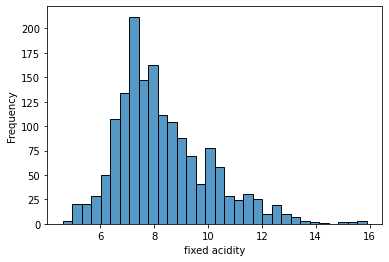

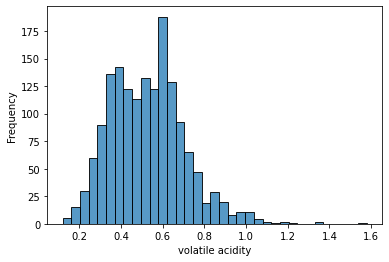

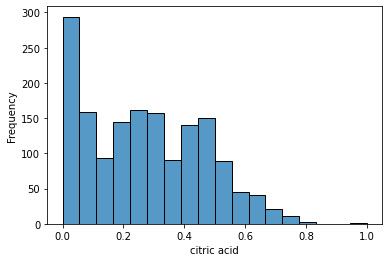

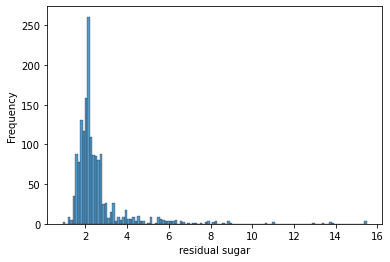

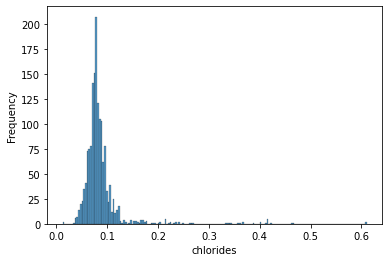

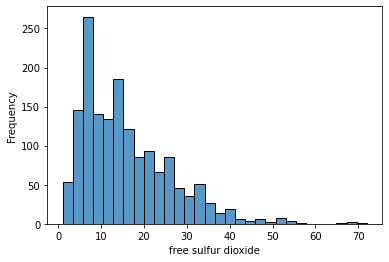

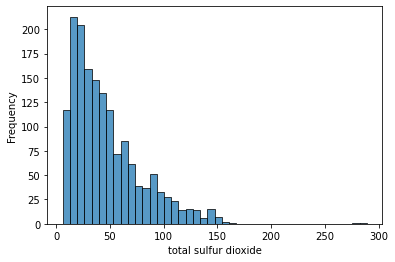

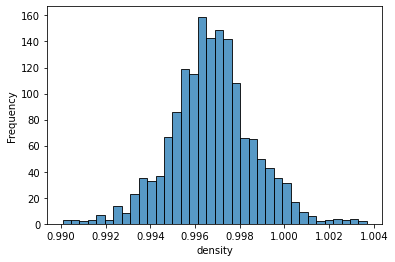

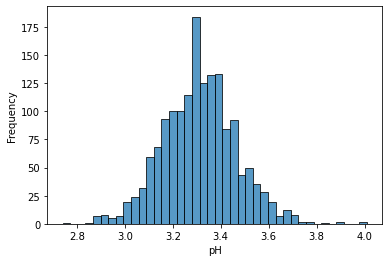

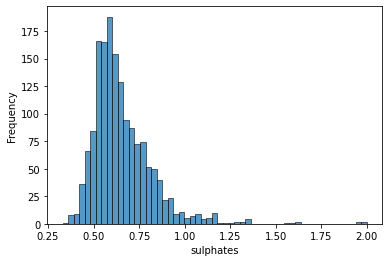

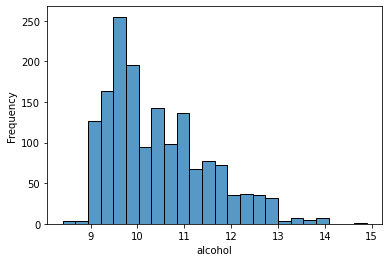

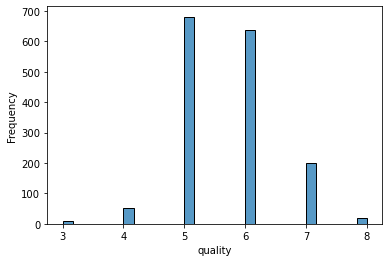

In [11]:
for col in df.columns:
    histPlot(col)

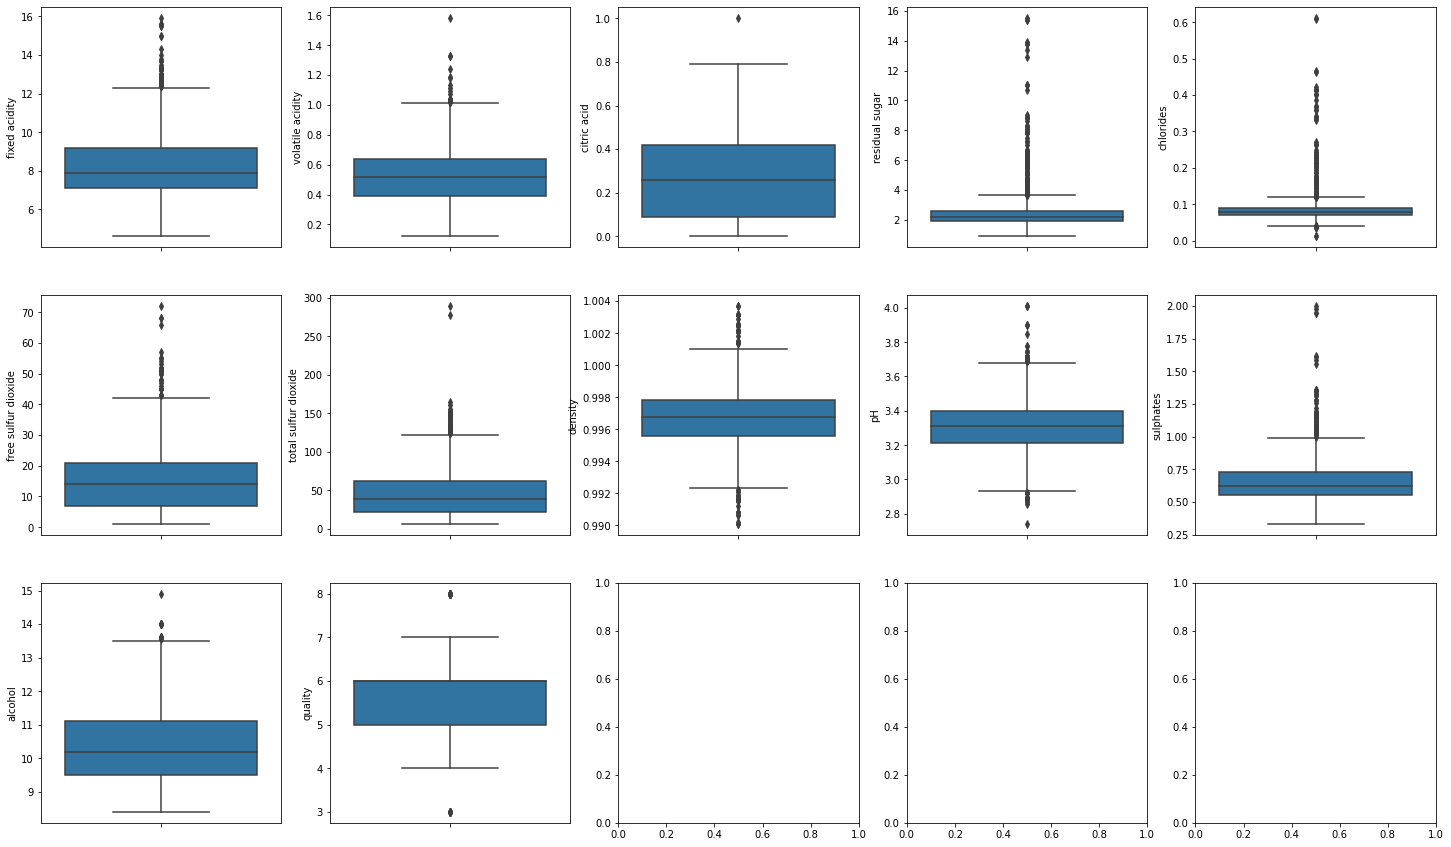

In [12]:
ls = []
a = 0
colName = [j for j in df.columns]
while a < 4:
    for i in range(5):
        ls.append((a, i))
    a += 1
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
for k in range(12):
    sns.boxplot(ax=ax[ls[k][0], ls[k][1]], y=colName[k], data=df)

### Plotting Count for Qualities

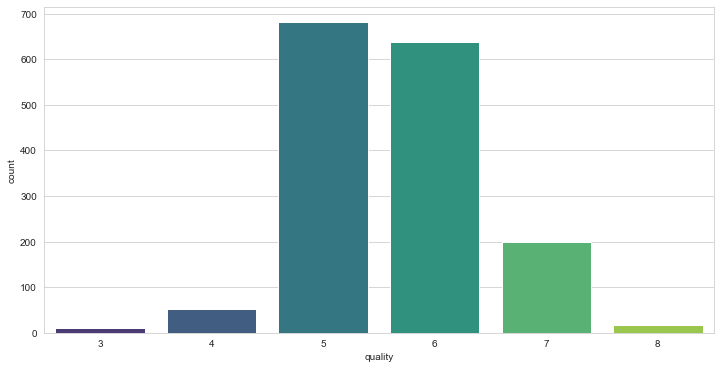

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="quality", data=df, palette='viridis');

### Finding Correlation among the variables

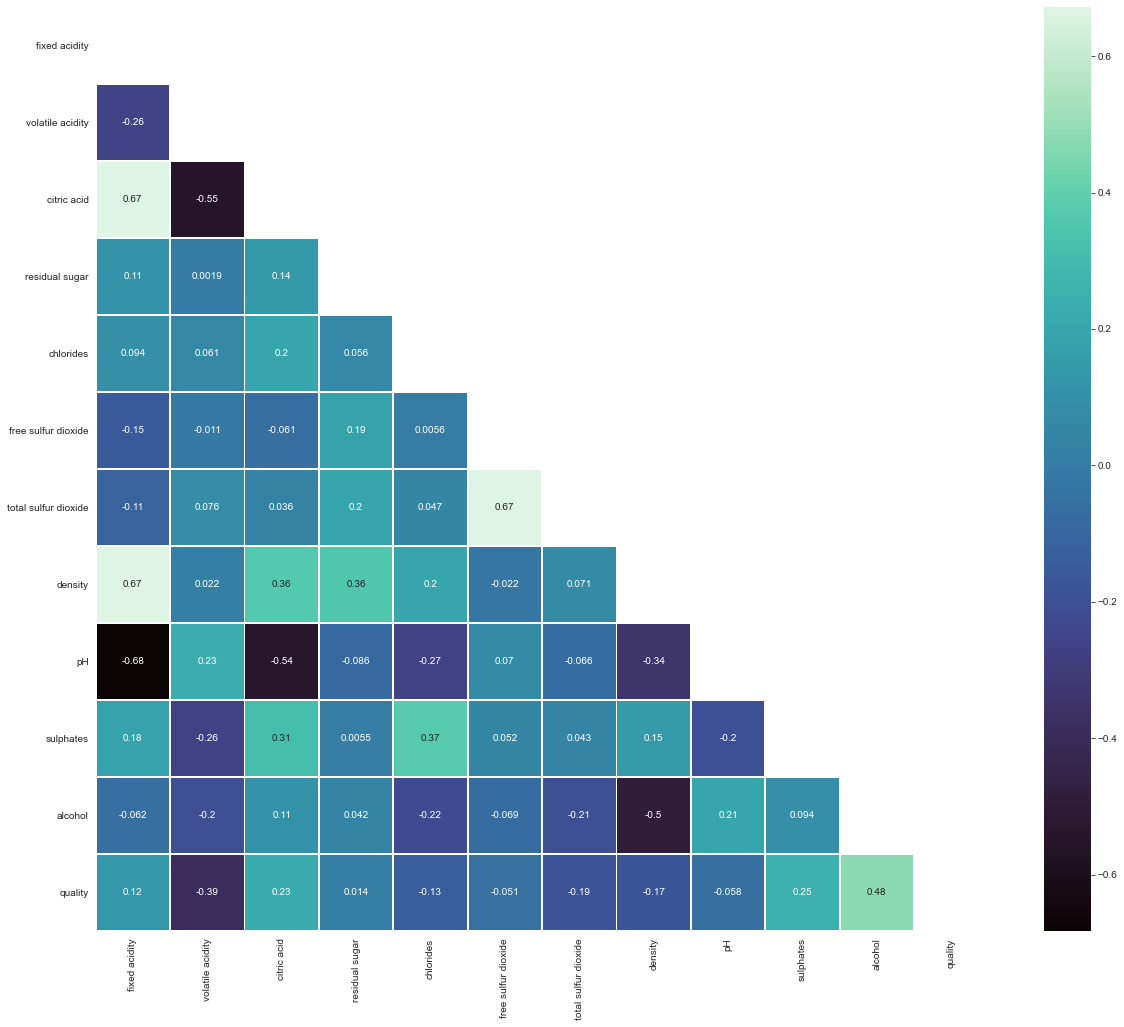

In [14]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="mako");

### Visualising Numerical Data

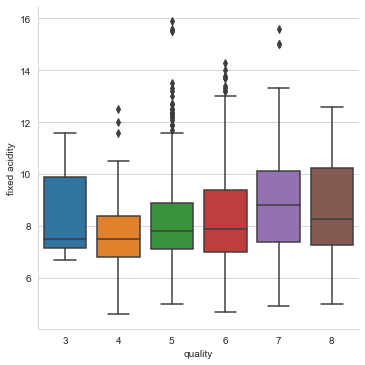

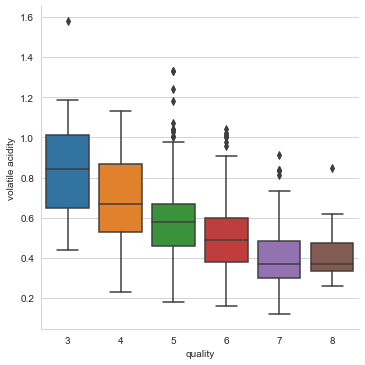

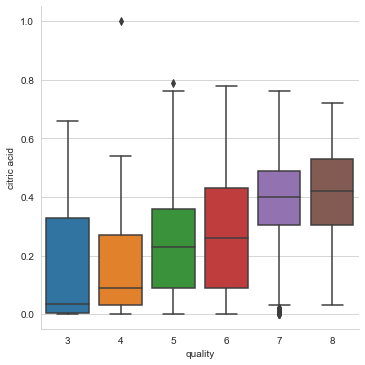

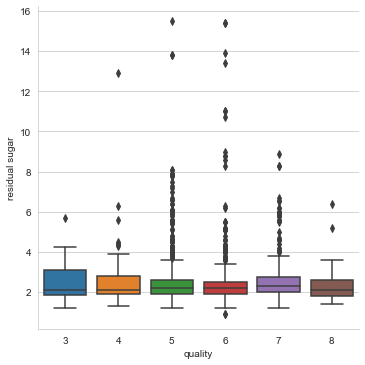

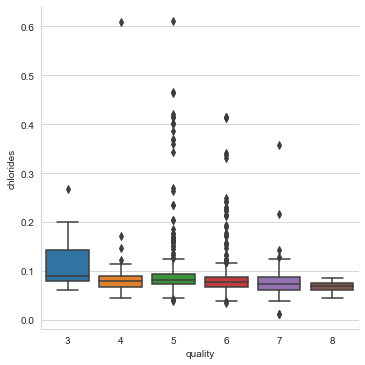

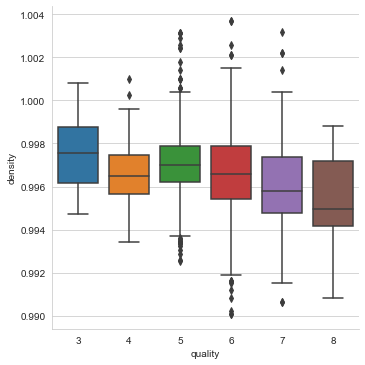

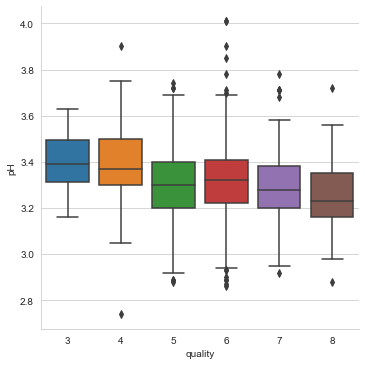

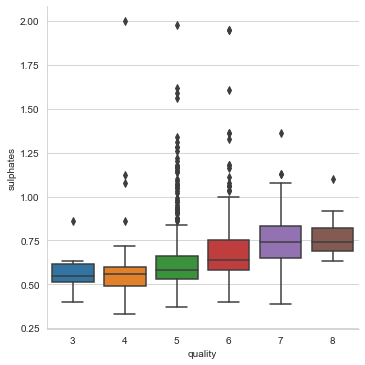

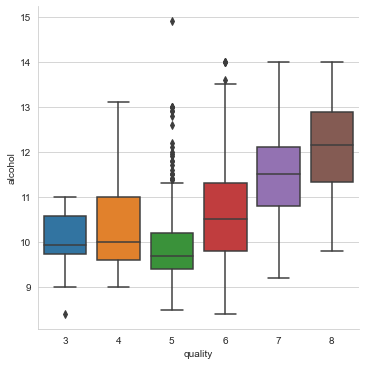

In [15]:
sns.catplot(x="quality", y="fixed acidity", data=df, kind="box")
sns.catplot(x="quality", y="volatile acidity", data=df, kind="box")
sns.catplot(x="quality", y="citric acid", data=df, kind="box")
sns.catplot(x="quality", y="residual sugar", data=df, kind="box")
sns.catplot(x="quality", y="chlorides", data=df, kind="box")
sns.catplot(x="quality", y="density", data=df, kind="box")
sns.catplot(x="quality", y="pH", data=df, kind="box")
sns.catplot(x="quality", y="sulphates", data=df, kind="box")
sns.catplot(x="quality", y="alcohol", data=df, kind="box");

### Acidity Type with Different Qualities of Wine

In [16]:
acidity_count = df["fixed acidity"].value_counts().reset_index()
acidity_count

,index,fixed acidity
0,7.2,67
1,7.1,57
2,7.8,53
3,7.5,52
4,7.0,50
...,...,...
91,4.6,1
92,13.5,1
93,4.9,1
94,15.9,1


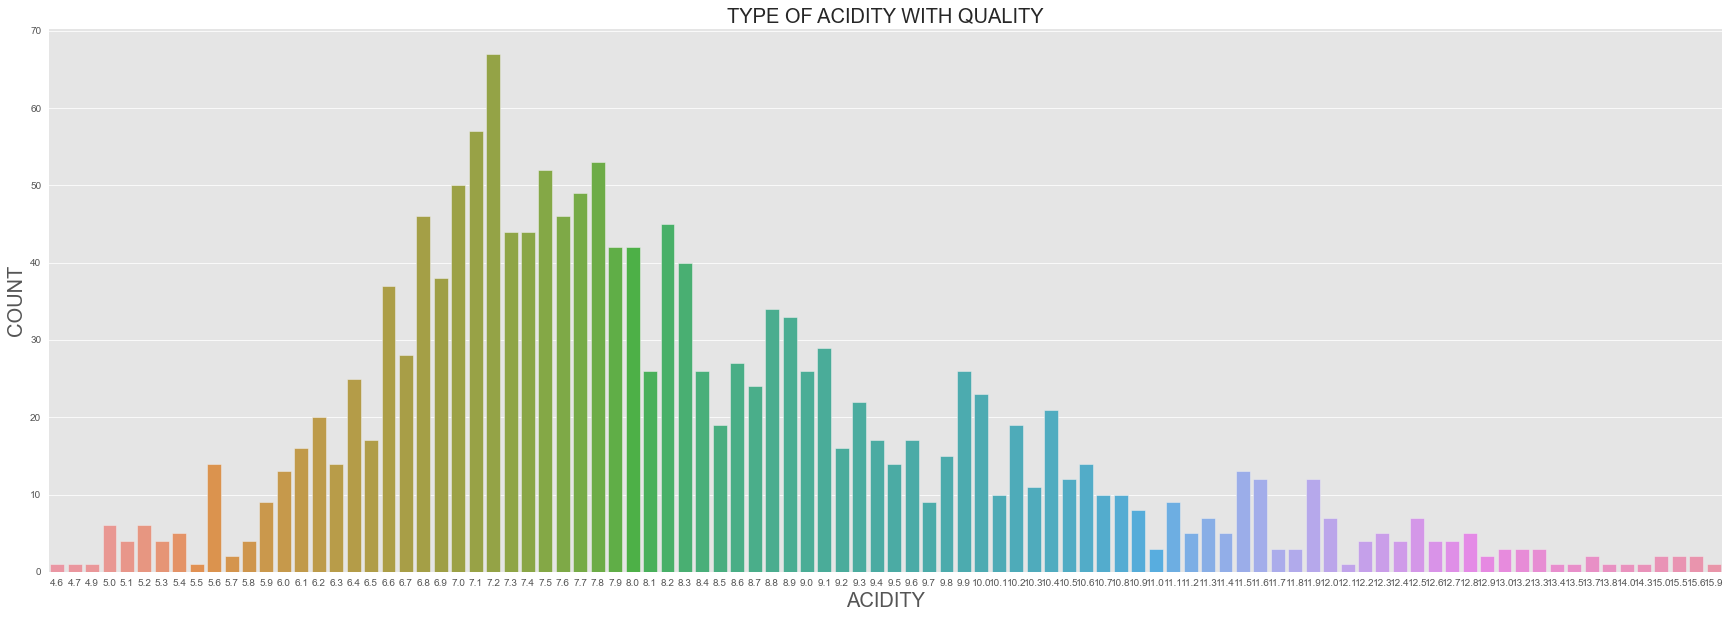

In [17]:
plt.figure(figsize=(30, 10))
plt.style.use("ggplot")
sns.barplot(x=acidity_count["index"], y=acidity_count["fixed acidity"])
plt.title("TYPE OF ACIDITY WITH QUALITY", fontsize=20)
plt.xlabel("ACIDITY", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

### Distribution of pH with Different Qualities of Wine

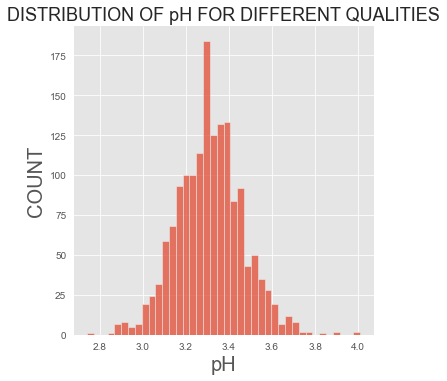

In [18]:
plt.style.use("ggplot")
sns.displot(df["pH"]);  # using displot here
plt.title("DISTRIBUTION OF pH FOR DIFFERENT QUALITIES", fontsize=18)
plt.xlabel("pH", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

### Skewness Correction

Here we will try to correct Skewness in some independent varaibles of our dataset

In [19]:
def skewnessCorrector(columnName):
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(df[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.distplot(df[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(df[columnName], plot=plt)
    plt.show();
    df[columnName], lam_fixed_acidity = boxcox(
        df[columnName])
    print('''After Correcting''')
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    sns.distplot(df[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(df[columnName], plot = plt)
    plt.show();

Before Correcting
Mu before correcting FIXED ACIDITY : 8.31963727329581, Sigma before correcting FIXED ACIDITY : 1.7405518001102729


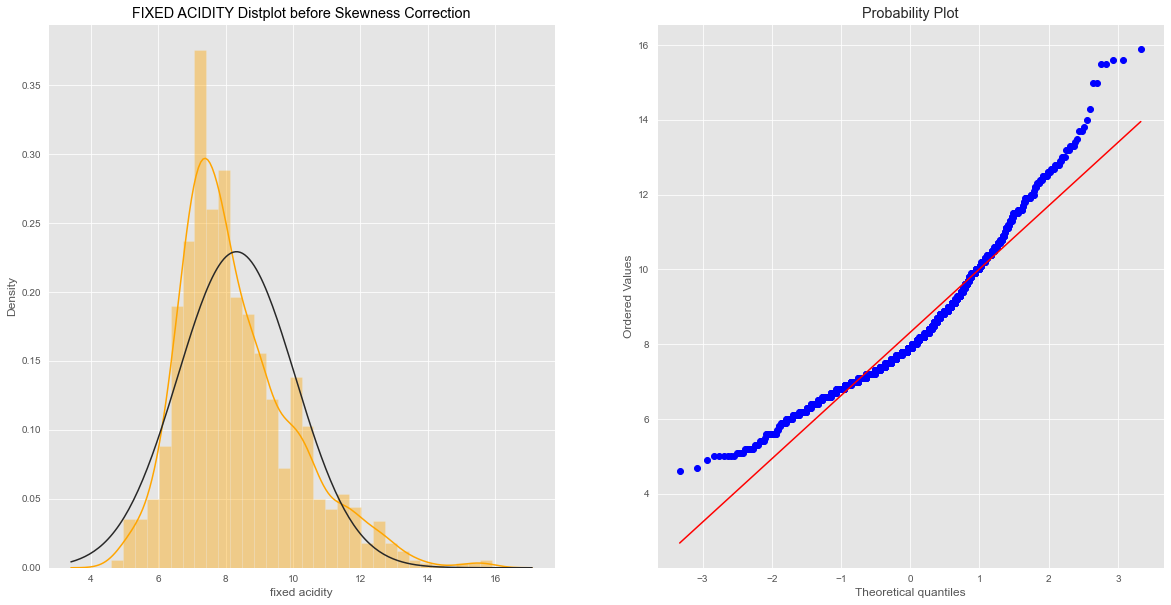

After Correcting
Mu after correcting FIXED ACIDITY : 8.31963727329581, Sigma after correcting FIXED ACIDITY : 1.7405518001102729


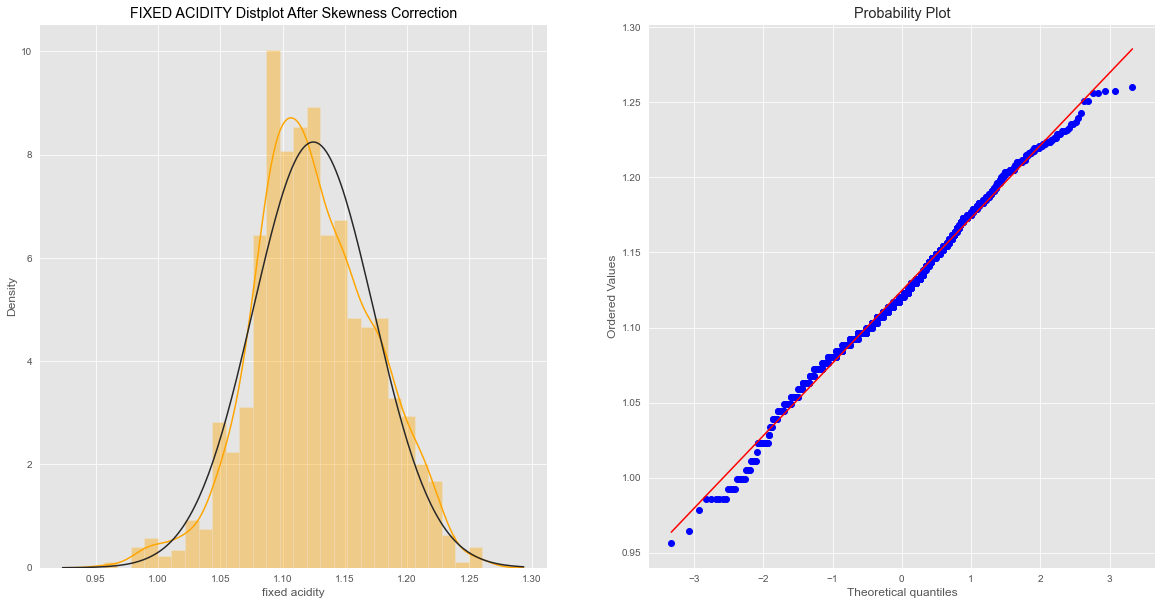

Before Correcting
Mu before correcting RESIDUAL SUGAR : 2.53880550343965, Sigma before correcting RESIDUAL SUGAR : 1.4094871124880495


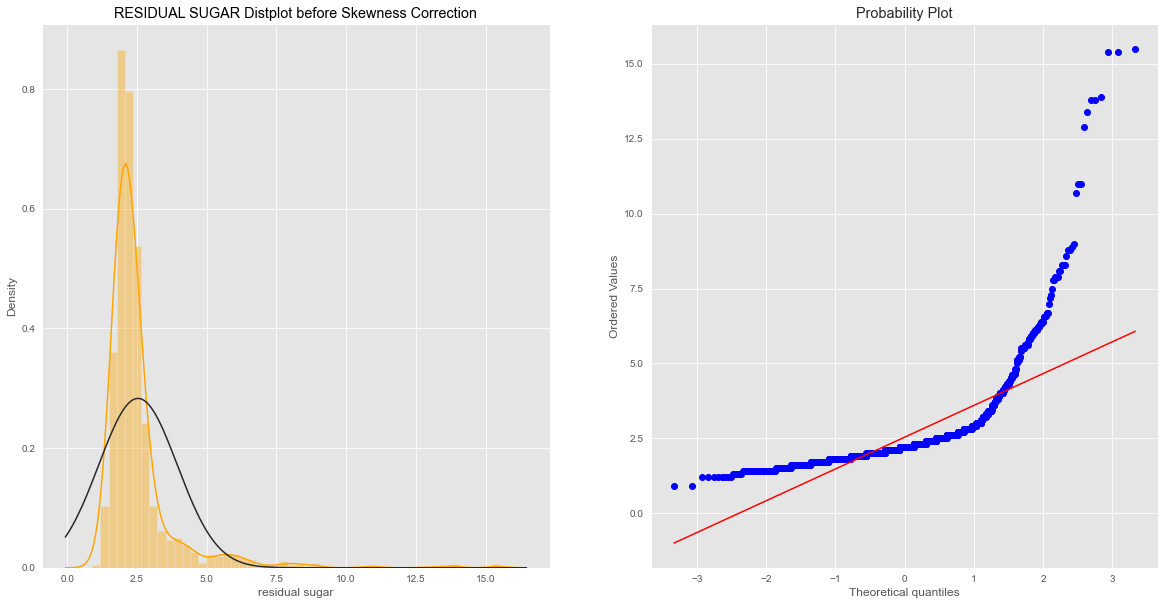

After Correcting
Mu after correcting RESIDUAL SUGAR : 2.53880550343965, Sigma after correcting RESIDUAL SUGAR : 1.4094871124880495


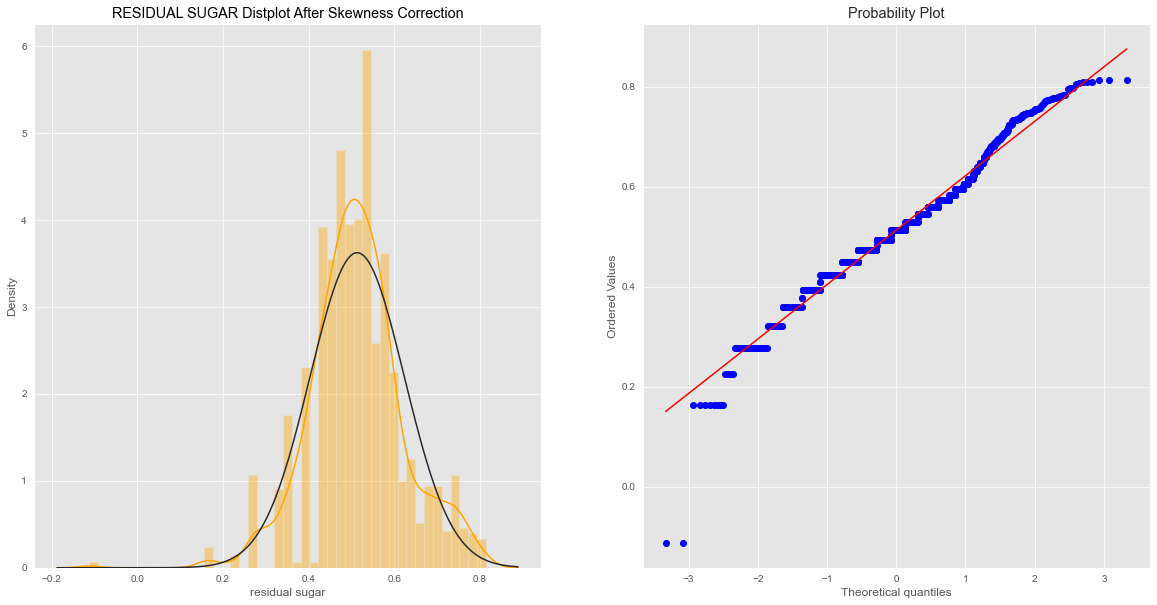

Before Correcting
Mu before correcting FREE SULFUR DIOXIDE : 15.874921826141339, Sigma before correcting FREE SULFUR DIOXIDE : 10.45688561493072


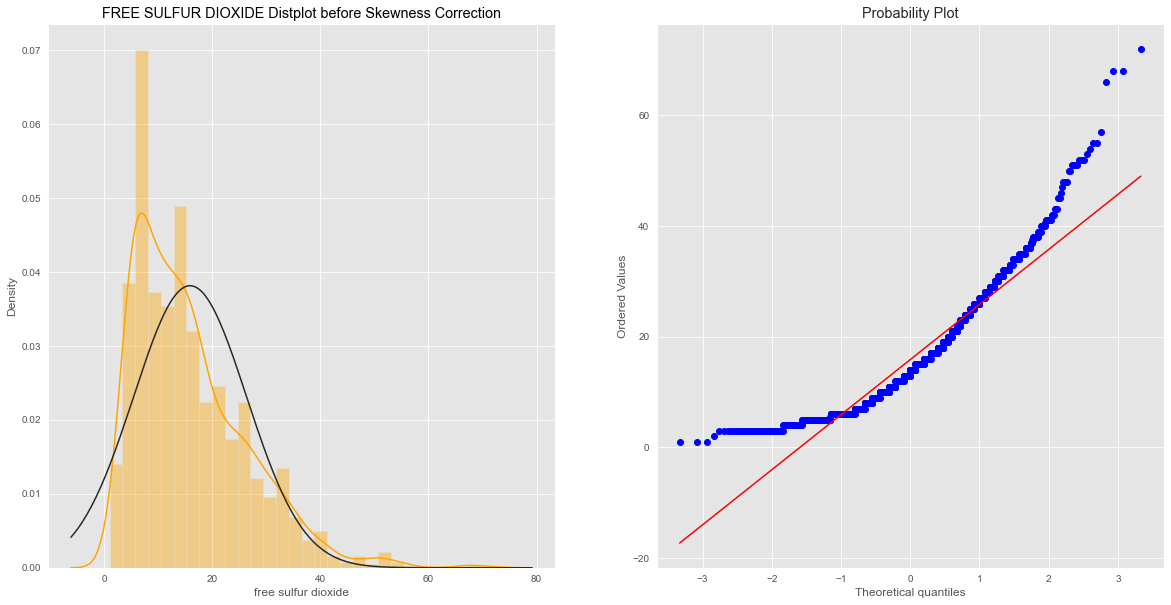

After Correcting
Mu after correcting FREE SULFUR DIOXIDE : 15.874921826141339, Sigma after correcting FREE SULFUR DIOXIDE : 10.45688561493072


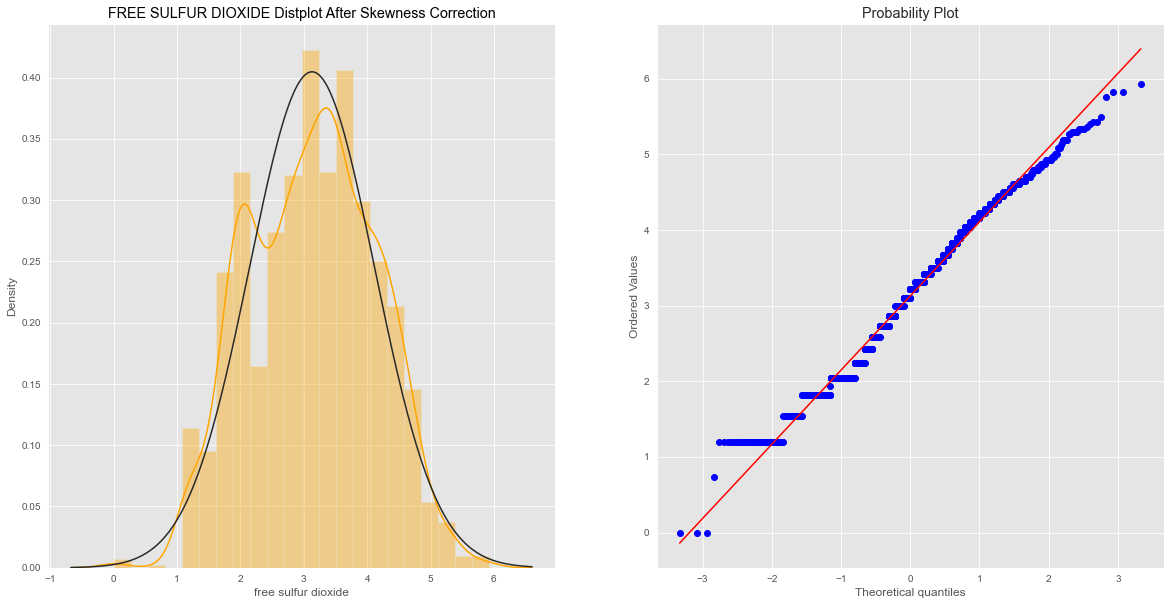

Before Correcting
Mu before correcting TOTAL SULFUR DIOXIDE : 46.46779237023139, Sigma before correcting TOTAL SULFUR DIOXIDE : 32.88503665178374


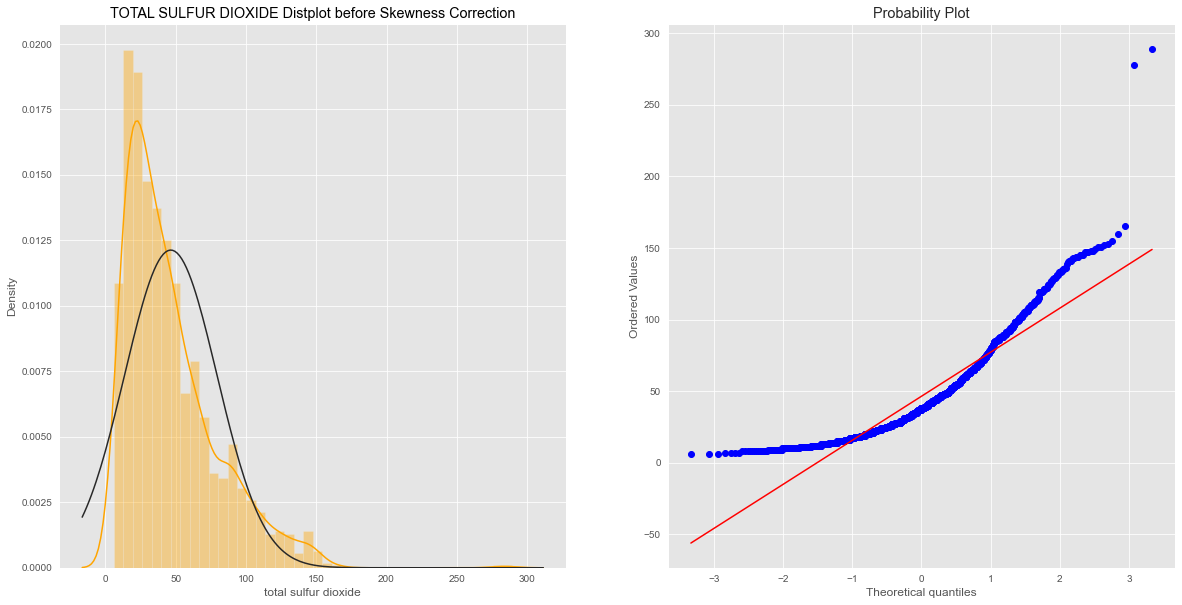

After Correcting
Mu after correcting TOTAL SULFUR DIOXIDE : 46.46779237023139, Sigma after correcting TOTAL SULFUR DIOXIDE : 32.88503665178374


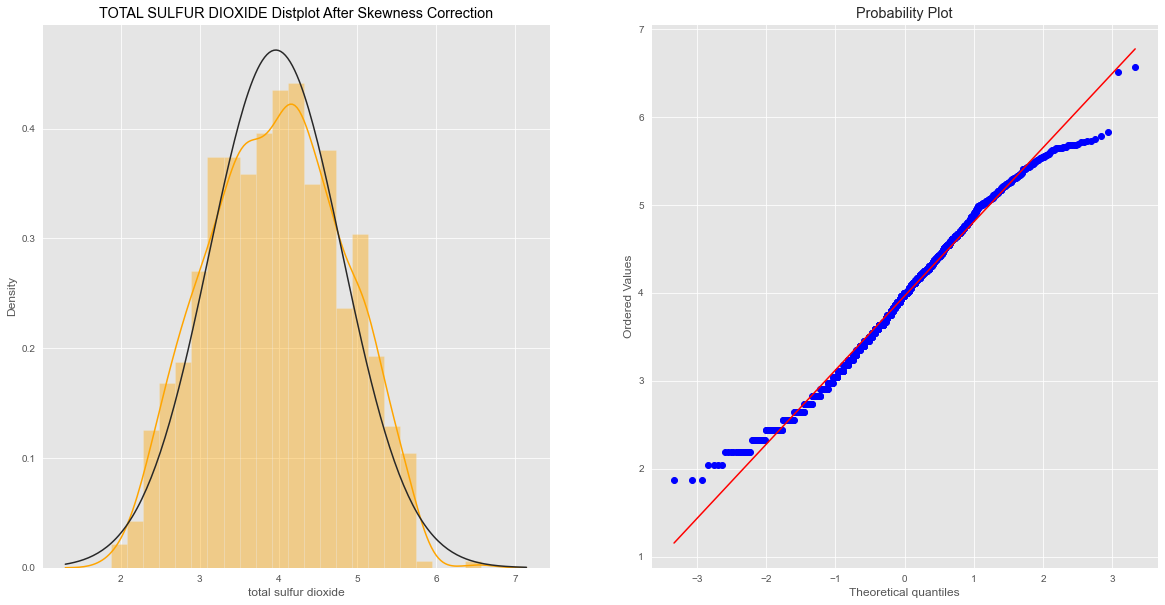

Before Correcting
Mu before correcting SULPHATES : 0.6581488430268917, Sigma before correcting SULPHATES : 0.16945396724179546


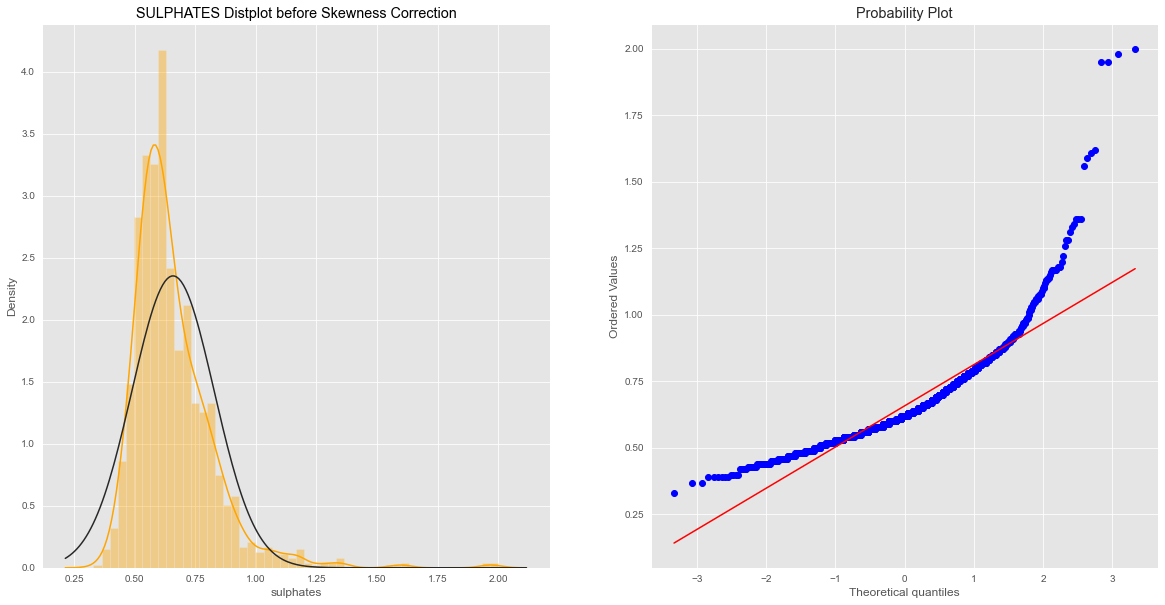

After Correcting
Mu after correcting SULPHATES : 0.6581488430268917, Sigma after correcting SULPHATES : 0.16945396724179546


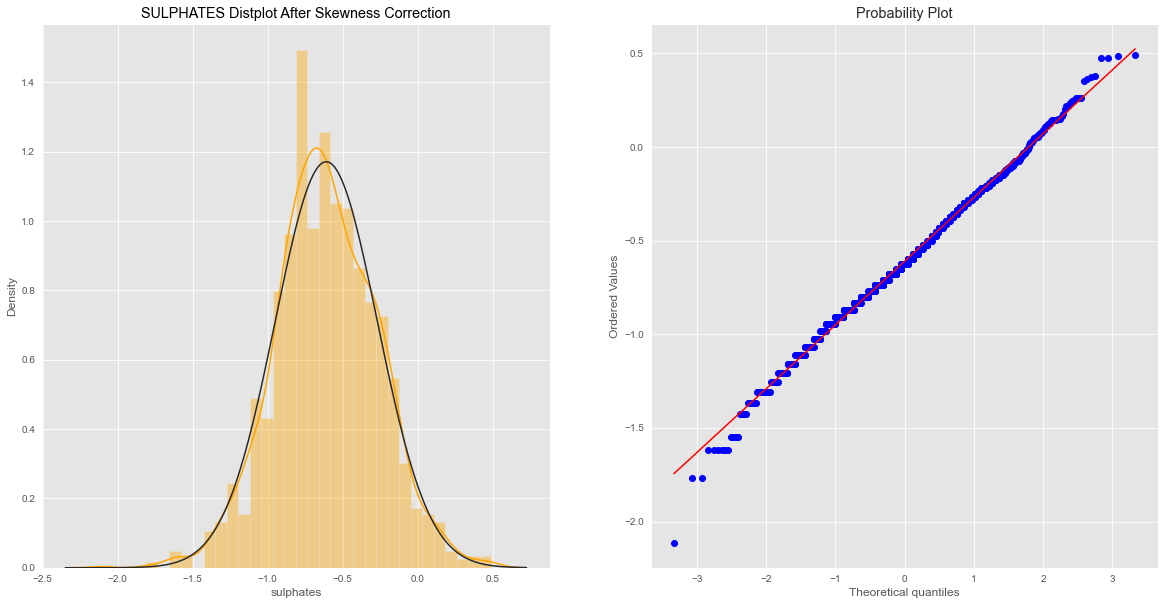

In [20]:
skewColumnList = [
    'fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'
]
for columns in skewColumnList:
    skewnessCorrector(columns)

### Outlier Correction

We have detected several outliers in our dataset here we will try to correct them.

In [21]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(df[column], 25)
        # 3st quartile
        Q3 = np.percentile(df[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[column] < Q1 - outlier_step)
                              | (df[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers

In [22]:
print("number of outliers detected --> ",
      len(df.loc[detect_outliers(df.columns[:-1])]))

number of outliers detected -->  48


In [23]:
df.loc[detect_outliers(df.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,0.956497,0.520,0.15,0.494302,0.054,2.427186,4.649352,0.99340,3.90,-0.801405,13.100000,4
94,0.985731,1.020,0.04,0.277689,0.045,4.920668,4.983161,0.99380,3.75,-1.111447,10.500000,4
95,0.964194,0.600,0.17,0.530233,0.058,3.504207,5.261323,0.99320,3.85,-0.678257,12.900000,6
442,1.257350,0.685,0.76,0.666360,0.100,2.046206,4.144017,1.00320,2.95,-0.476630,11.200000,7
553,0.985731,1.040,0.24,0.360736,0.050,4.503448,5.136097,0.99340,3.74,-0.622818,11.500000,5
554,1.256323,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
555,1.256323,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
557,1.257350,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
588,0.985731,0.420,0.24,0.473382,0.060,3.673341,4.327250,0.99170,3.72,-0.354821,14.000000,8
652,1.260365,0.360,0.65,0.768664,0.096,3.900481,4.758716,0.99760,2.98,-0.191541,14.900000,5


Dropping Outliers

In [24]:
df = df.drop(detect_outliers(df.columns[:-1]),axis = 0).reset_index(drop = True)

### 2) Using Pandas Profiling

In [25]:
!pip install pandas_profiling

In [26]:
pro = ProfileReport(df,explorative=True)
pro.to_file('output.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Preprocessing
If quality value is less than or eqaul to 6 then it will be in class 0

If quality value is greater than 6 then it will be in class 1

In [27]:
df['quality'] = np.where(df['quality'] > 6, 1, 0)
df['quality'].value_counts()

0    1345
1     206
Name: quality, dtype: int64

In [28]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [29]:
X

array([[ 1.10330574,  0.7       ,  0.        , ...,  3.51      ,
        -0.80140519,  9.4       ],
       [ 1.11687459,  0.88      ,  0.        , ...,  3.2       ,
        -0.47663041,  9.8       ],
       [ 1.11687459,  0.76      ,  0.04      , ...,  3.26      ,
        -0.54624593,  9.8       ],
       ...,
       [ 1.05873705,  0.51      ,  0.13      , ...,  3.42      ,
        -0.33647043, 11.        ],
       [ 1.03914895,  0.645     ,  0.12      , ...,  3.57      ,
        -0.41307232, 10.2       ],
       [ 1.0442499 ,  0.31      ,  0.47      , ...,  3.39      ,
        -0.52231564, 11.        ]])

In [30]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
X.shape

(1551, 11)

In [32]:
y.shape

(1551,)

### Splitting Dataset into Training Set and Test Set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

### Standardizing Independent Variables

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training Classifiers on Training Set and drawing Inference

In [35]:
accuracy_scores = {}
def predictor(predictor, params):
    global accuracy_scores
    if predictor == 'lr':
        print('Training Logistic Regression on Training Set')
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(**params)

    elif predictor == 'svm':
        print('Training Support Vector Machine on Training Set')
        from sklearn.svm import SVC
        classifier = SVC(**params)

    elif predictor == 'knn':
        print('Training K-Nearest Neighbours on Training Set')
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(**params)

    elif predictor == 'dt':
        print('Training Decision Tree Classifier on Training Set')
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(**params)

    elif predictor == 'nb':
        print('Training Naive Bayes Classifier on Training Set')
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(**params)

    elif predictor == 'rfc':
        print('Training Random Forest Classifier on Training Set')
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(**params)

    classifier.fit(X_train, y_train)

    print('''Predicting Single Cell Result''')
    single_predict = classifier.predict(sc.transform([[
        7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4
    ]]))
    if single_predict > 0 :
        print('High Quality Wine')
    else:
        print('Low Quality Wine')
    print('''Prediciting Test Set Result''')
    y_pred = classifier.predict(X_test)
    
    result = np.concatenate((y_pred.reshape(len(y_pred), 1),
                             y_test.reshape(len(y_test), 1)),1)
    print(result, '\n')
    print('''Making Confusion Matrix''')
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm, '\n')
    plot_confusion_matrix(classifier, X_test, y_test, cmap="pink")
    print('True Positives :', cm[0][0])
    print('False Positives :', cm[0][1])
    print('False Negatives :', cm[1][0])
    print('True Negatives :', cm[0][1], '\n')

    print('''Classification Report''')
    print(classification_report(y_test, y_pred,
          target_names=['0', '1'], zero_division=1))

    print('''Evaluating Model Performance''')
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, '\n')

    print('''Applying K-Fold Cross validation''')
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(
        estimator=classifier, X=X_train, y=y_train, cv=10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    accuracy_scores[classifier] = accuracies.mean()*100
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100), '\n')

### Training Logistic Regression on Training Set

Training Logistic Regression on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 

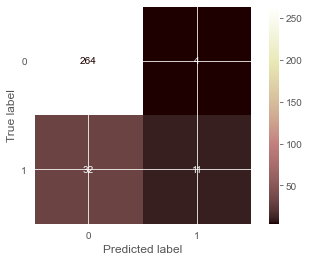

In [36]:
predictor('lr', {'penalty': 'l1', 'solver': 'liblinear'})

### Training SVM on Training Set

Training Support Vector Machine on Training Set
Predicting Single Cell Result
Low Quality Wine
Prediciting Test Set Result
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [

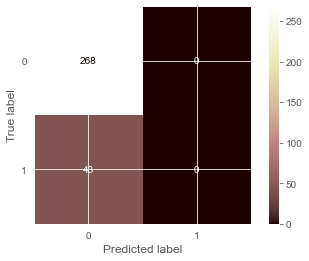

In [37]:
predictor('svm', {'C': .5, 'gamma': 0.8,
          'kernel': 'linear', 'random_state': 0})

### Training Kernel SVM on Training Set

Training Support Vector Machine on Training Set
Predicting Single Cell Result
Low Quality Wine
Prediciting Test Set Result
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [

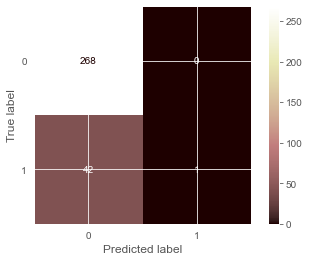

In [38]:
predictor('svm', {'C': .25, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0})

### Training K-Nearest Neighbours on Training Set

Training K-Nearest Neighbours on Training Set
Predicting Single Cell Result
Low Quality Wine
Prediciting Test Set Result
[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 

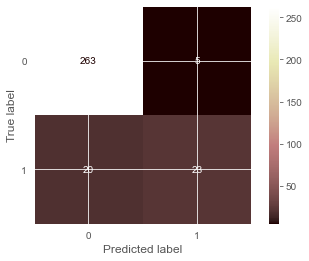

In [39]:
predictor('knn', {'algorithm': 'auto', 'n_jobs': 1,
          'n_neighbors': 8, 'weights': 'distance'})

### Training Decision Tree on Training Set

Training Decision Tree Classifier on Training Set
Predicting Single Cell Result
Low Quality Wine
Prediciting Test Set Result
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]


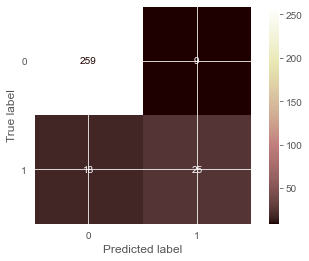

In [40]:
predictor('dt', {'criterion': 'entropy', 'max_features': 'auto',
          'splitter': 'best', 'random_state': 0})

### Training Naive Bayes on Training Set

Training Naive Bayes Classifier on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 

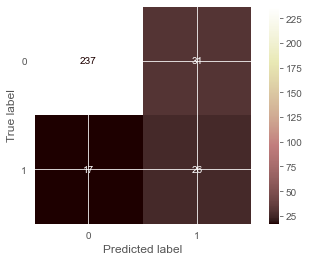

In [41]:
predictor('nb', {})

### Training Random Forest Classifier on Training Set

Training Random Forest Classifier on Training Set
Predicting Single Cell Result
Low Quality Wine
Prediciting Test Set Result
[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]


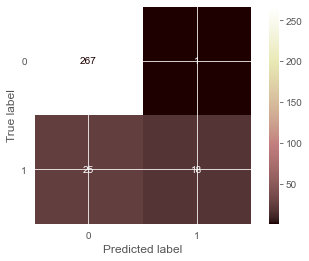

In [42]:
predictor('rfc', {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100,'random_state':0})

### Finding which Classifier performed best

In [43]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  RandomForestClassifier(max_features='log2', random_state=0) with an accuracy of  90.81


### Plotting Bar Chart for Accuracies of different classifiers

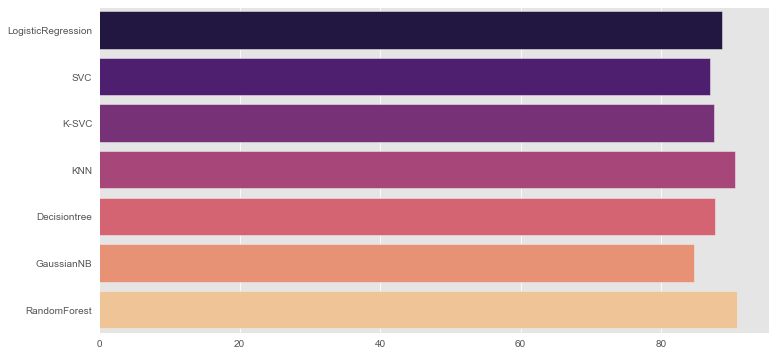

In [44]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = ['LogisticRegression', 'SVC',
               'K-SVC', 'KNN', 'Decisiontree', 'GaussianNB', 'RandomForest']
sns.barplot(x=model_accuracies, y=model_names, palette='magma');

### Summary
Random Forest Classifier performed best on this data set with an accuracy of 90.81%

K-Nearest Classifier was just behind with an accuracy of an accuracy of 90.56%